# **1. Import Library**

Library yang akan digunakan pada notebook ini adalah:

- pandas: untuk memproses dan menganalisis data dalam bentuk tabel (dataframe).
- numpy: untuk operasi numerik.
- seaborn dan matplotlib.pyplot: untuk visualisasi data.
- sklearn.feature_extraction.text.TfidfVectorizer: untuk mengubah data teks menjadi representasi numerik menggunakan metode TF-IDF.
- sklearn.metrics.pairwise.cosine_similarity: untuk menghitung kemiripan antar item berdasarkan vektor TF-IDF.
- tensorflow dan keras: untuk membangun model ML.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# **2. Data Loading**

Dataset yang digunakan dalam proyek ini diambil dari [Kaggle E-Commerce Dataset](https://www.kaggle.com/datasets/shivrajguvi/e-commerce-dataset-for-practice) dan merupakan simulasi transaksi pengguna yang mencakup informasi pengguna, produk, transaksi, dan perilaku pengguna. Dataset ini terdiri dari beberapa fitur yaiu:
- UserID: Identifikasi unik untuk setiap pengguna.
- UserName: Nama pengguna yang disimulasikan.
- Age: Usia pengguna (antara 18 hingga 70 tahun).
- Gender: Jenis kelamin pengguna (Male, Female, atau Non-Binary).
- Country: Negara asal pengguna (USA, Canada, UK, Australia, India, Germany).
- SignUpDate: Tanggal pengguna mendaftar di platform.
- ProductID: Identifikasi unik untuk setiap produk.
- ProductName: Nama produk yang dibeli (misalnya: Laptop, Smartphone, Headphones, dsb.).
- Category: Kategori produk (Electronics, Apparel, Books, Accessories).
- Price: Harga produk ($)
- PurchaseDate: Tanggal transaksi dilakukan.
- Quantity: Jumlah unit produk yang dibeli dalam satu transaksi.
- TotalAmount: Total nominal yang dibelanjakan oleh pengguna (Price * Quantity).
- HasDiscountApplied: Menunjukkan apakah diskon diterapkan dalam transaksi (True/False).
- DiscountRate: Besarnya diskon yang diberikan (antara 0 hingga 0.5).
- ReviewScore: Skor ulasan yang diberikan pengguna untuk produk (1 hingga 5).
- ReviewText: Ulasan dalam bentuk teks singkat (Excellent, Good, Average, Poor).



In [ ]:
#Load dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('ecommerce_synthetic_dataset.csv')
df.head()

,UserID,UserName,Age,Gender,Country,SignUpDate,ProductID,ProductName,Category,Price,PurchaseDate,Quantity,TotalAmount,HasDiscountApplied,DiscountRate,ReviewScore,ReviewText,LastLogin,SessionDuration,DeviceType,ReferralSource
0,1,User_1,39,Male,UK,2021-02-01,8190,Shoes,Books,532.37,2021-02-25,1,532.37,False,0.02,5.1,Excellent,2024-05-03 04:04:27.591583,45.02,Mobile,Social Media
1,2,User_2,25,Female,Canada,2020-12-04,9527,T-shirt,Accessories,848.83,2021-09-22,1,848.83,True,0.29,5.1,Excellent,2024-08-31 04:04:27.591606,13.83,Mobile,Social Media
2,3,User_3,43,Male,Canada,2022-07-08,3299,Headphones,Apparel,64.88,2021-11-30,2,129.76,False,0.03,3.2,Good,2024-07-28 04:04:27.591611,59.09,Tablet,Organic Search
3,4,User_4,44,Male,Germany,2021-06-07,8795,T-shirt,Apparel,465.08,2021-10-14,2,930.16,False,0.23,4.3,Good,2024-03-11 04:04:27.591615,55.42,Desktop,Email Marketing
4,5,User_5,23,Female,Canada,2021-11-06,1389,Shoes,Books,331.82,2021-01-12,1,331.82,False,0.02,5.1,Average,2024-07-02 04:04:27.591619,14.99,Tablet,Email Marketing


# **3. Exploratory Data Analysis**

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan. Beberapa tahapan EDA yang akan dilakukan adalah pemahaman terhadap struktur data, analisis setiap fitur, pengecekan data duplikat dan nilai null, analisis univariate serta analisis outlier data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   UserID              100000 non-null  int64  
 1   UserName            100000 non-null  object 
 2   Age                 100000 non-null  int64  
 3   Gender              100000 non-null  object 
 4   Country             100000 non-null  object 
 5   SignUpDate          100000 non-null  object 
 6   ProductID           100000 non-null  int64  
 7   ProductName         100000 non-null  object 
 8   Category            100000 non-null  object 
 9   Price               100000 non-null  float64
 10  PurchaseDate        100000 non-null  object 
 11  Quantity            100000 non-null  int64  
 12  TotalAmount         100000 non-null  float64
 13  HasDiscountApplied  100000 non-null  bool   
 14  DiscountRate        100000 non-null  float64
 15  ReviewScore         100000 non-null

**Inisght:** Terdapat 21 fitur pada dataset ecommerce yang digunakan. Fitur tersebut terdiri dari 12 fitur dengan tipe string, 4 fitur dengan tipe integer, dan 5 fitur dengan tipe float. Dataset terdiri dari 100.000 row.

In [ ]:
#Eksplor Parameter Statistik
df.describe(include="all")

,UserID,UserName,Age,Gender,Country,SignUpDate,ProductID,ProductName,Category,Price,PurchaseDate,Quantity,TotalAmount,HasDiscountApplied,DiscountRate,ReviewScore,ReviewText,LastLogin,SessionDuration,DeviceType,ReferralSource
count,100000.000000,100000,100000.000000,100000,100000,100000,100000.000000,100000,100000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000,100000.000000,100000,100000
unique,NaN,100000,NaN,3,6,1096,NaN,7,4,NaN,366,NaN,NaN,2,NaN,NaN,4,100000,NaN,3,4
top,NaN,User_99984,NaN,Non-Binary,USA,2022-01-17,NaN,T-shirt,Apparel,NaN,2021-07-16,NaN,NaN,False,NaN,NaN,Excellent,2024-09-11 04:04:28.072330,NaN,Mobile,Email Marketing
freq,NaN,1,NaN,33538,16844,125,NaN,14401,25201,NaN,316,NaN,NaN,50221,NaN,NaN,25035,1,NaN,33568,25154
mean,50000.500000,NaN,43.460810,NaN,NaN,NaN,5508.117230,NaN,NaN,505.631966,NaN,2.495690,1260.852360,NaN,0.249831,4.006239,NaN,NaN,62.408836,NaN,NaN
std,28867.657797,NaN,14.980333,NaN,NaN,NaN,2606.544036,NaN,NaN,286.137505,NaN,1.120354,964.100243,NaN,0.144505,0.998750,NaN,NaN,33.177372,NaN,NaN
min,1.000000,NaN,18.000000,NaN,NaN,NaN,1000.000000,NaN,NaN,10.000000,NaN,1.000000,10.020000,NaN,0.000000,-0.600000,NaN,NaN,5.000000,NaN,NaN
25%,25000.750000,NaN,31.000000,NaN,NaN,NaN,3228.000000,NaN,NaN,257.137500,NaN,1.000000,494.677500,NaN,0.130000,3.300000,NaN,NaN,33.720000,NaN,NaN
50%,50000.500000,NaN,43.000000,NaN,NaN,NaN,5520.000000,NaN,NaN,505.950000,NaN,2.000000,966.080000,NaN,0.250000,4.000000,NaN,NaN,62.415000,NaN,NaN
75%,75000.250000,NaN,56.000000,NaN,NaN,NaN,7776.000000,NaN,NaN,753.732500,NaN,4.000000,1850.330000,NaN,0.370000,4.700000,NaN,NaN,91.040000,NaN,NaN


**Insight:**

- Terdapat 3 jenis kelamin pada dataset yang kemungkinan karena mengikuti gaya hidup barat (non-binary).
- Mayoritas pelanggan dari ecommerce berasal dari USA dengan 16844 pelanggan.
- Barang yang paling sering dibeli adalah T-Shirt dan kategori yang paling menjual adalah Apparel.
- Orang-orang sering melakukan pembelian barang dari ecommerce melalui mobile atau ponsel.
- Referal aplikasi ecommerce kebanyakan didapatkan dari marketing email yang ditujukan pada pelanggan, sehingga menandakan bahwa teknik marketing ini cukup bagus.
- Pada kolom ReviewScore, terdapat data yang abnormal yaitu reviewnya bernilai negatif. Range dari nilai review juga salah karena range harusnya dari 1-5, sehingga nilai rating yang lebih dari 5 itu salah. Maka, ini harus ditangani pada tahap preprocessing nanti.

In [ ]:
#Cek data null
df.isna().sum()

,0
UserID,0
UserName,0
Age,0
Gender,0
Country,0
SignUpDate,0
ProductID,0
ProductName,0
Category,0
Price,0


**Insight:** Tidak ada nilai null

In [ ]:
#Cek data duplikat
df.duplicated().sum()

np.int64(0)

**Insight:** Tidak ada nilai duplikat.

In [ ]:
#Info tentang negara asal dari pembeli
df['Country'].value_counts()

,count
Country,
USA,16844
Canada,16767
UK,16699
Germany,16582
Australia,16570
India,16538


**Insight:** Pengguna berasal dari enam negara utama yaitu: USA, Canada, UK, Germany, Australia, dan India. Jumlah pengguna juga seimbang dengan sekitar +/- 16.500 pengguna per negara. Hal ini menandakan bahwa produk memiliki jangkauan global yang merata. Mayoritas pengguna berasal dari USA sebanyak 16844 pengguna.

In [ ]:
#Info tentang tipe product yang ada
df['ProductName'].value_counts()

,count
ProductName,
T-shirt,14401
Headphones,14396
Book,14360
Watch,14287
Shoes,14261
Laptop,14169
Smartphone,14126


Text(0.5, 1.0, 'Product Name')

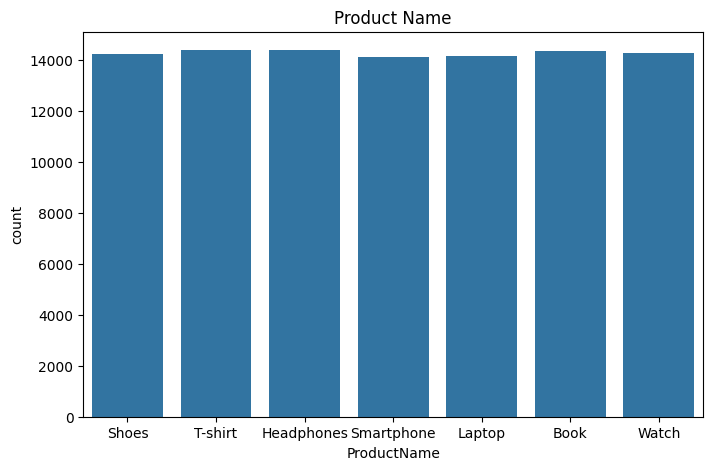

In [ ]:
#Visualisasi tipe produk
plt.figure(figsize=(8, 5))

sns.countplot(x=df['ProductName'])
plt.title('Product Name')

**Insight:** Produk yang paling banyak dibeli adalah T-shirt dengan 14.401 pembelian dan diikuti sangat dekat oleh Headphones, Book, Watch, Shoes, Laptop, dan Smartphone. Namun, produk yang dibeli cukup seimbang untuk semua tipe produk. Ini menandakan bahwa pelanggan menunjukkan minat yang seimbang terhadap berbagai jenis barang.

In [ ]:
#Info tentang tipe kategori yang ada
df['Category'].value_counts()

,count
Category,
Apparel,25201
Accessories,25015
Electronics,24936
Books,24848


Text(0.5, 1.0, 'Category')

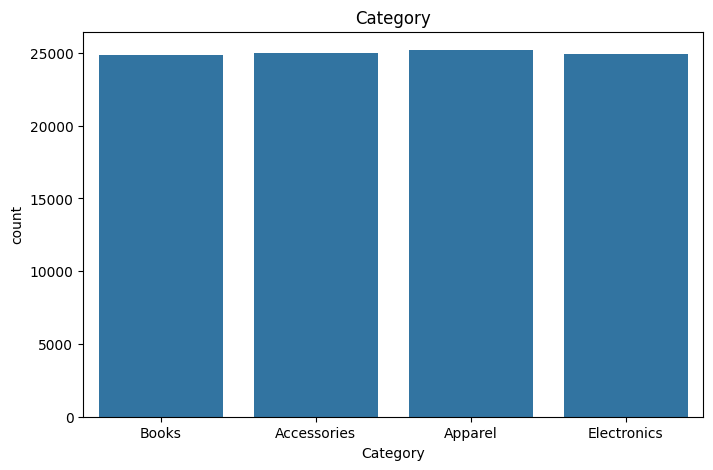

In [ ]:
#Visualisasi tipe Category
plt.figure(figsize=(8, 5))

sns.countplot(x=df['Category'])
plt.title('Category')

**Insight:** Kategori produk yang paling banyak diminati adalah Apparel yang kemudian diikuti dengan Accessories, Electronics, dan Books. Semua kategori juga seimbang yang menunjukkan bahwa konsumen memiliki preferensi yang cukup merata terhadap berbagai kategori.

In [ ]:
#Info tentang tipe referal yang ada
df['ReferralSource'].value_counts()

,count
ReferralSource,
Email Marketing,25154
Ad Campaign,25087
Organic Search,25021
Social Media,24738


Text(0.5, 1.0, 'Referral Source')

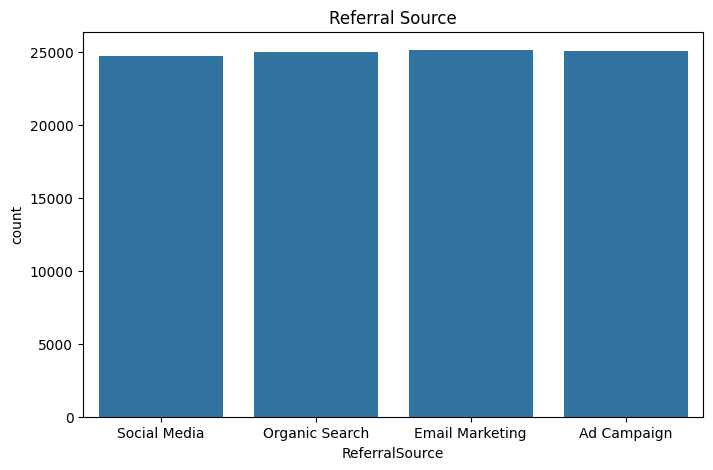

In [ ]:
#Visualisasi tipe referal
plt.figure(figsize=(8, 5))

sns.countplot(x=df['ReferralSource'])
plt.title('Referral Source')

**Insight:** Dapat dilihat bahwa ada 4 metode referal yang digunakan oleh platform ecommerce dari dataset ini, dengan metode paling tinggi Email Marketing, diikuti oleh Ad Campaign, Organic Search dan Sosial Media.

In [ ]:
#Info tentang tipe review yang ada
df['ReviewText'].value_counts()

,count
ReviewText,
Excellent,25035
Good,25029
Poor,24978
Average,24958


Text(0.5, 1.0, 'Review Text')

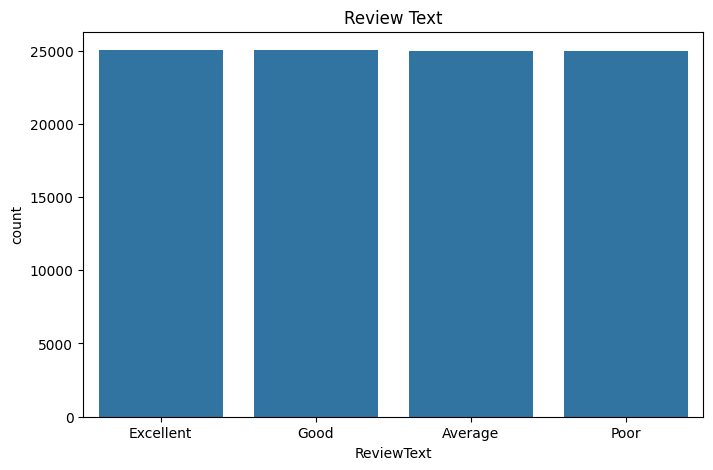

In [ ]:
#Visualisasi tipe review
plt.figure(figsize=(8, 5))

sns.countplot(x=df['ReviewText'])
plt.title('Review Text')

**Insight:** Terdapat 4 tipe review yang ada pada dataset ecommerce yaitu Excellent, Good, Poor, dan Average. Mayoritas review bernilai Excellent yang berarti banyak yang puas dengan transaksi pembelian mereka.

In [ ]:
# Melihat kaitan ReviewText dan ReviewScore (Apakah ReviewText buruk berarti ReviewScore Rendah? Dan sebaliknya?)
# Jika iya, maka harusnya tidak ada hasil untuk kode di bawah
df[(df['ReviewText'] == 'Poor') & (df['ReviewScore'] > 7)].head(5)

,UserID,UserName,Age,Gender,Country,SignUpDate,ProductID,ProductName,Category,Price,PurchaseDate,Quantity,TotalAmount,HasDiscountApplied,DiscountRate,ReviewScore,ReviewText,LastLogin,SessionDuration,DeviceType,ReferralSource
562,563,User_563,45,Non-Binary,Canada,2022-03-16,8122,Headphones,Apparel,735.88,2021-03-17,2,1471.76,True,0.02,8.0,Poor,2024-01-08 04:04:27.593931,10.26,Tablet,Organic Search
682,683,User_683,40,Non-Binary,Canada,2020-06-06,3709,Laptop,Electronics,375.39,2021-01-28,3,1126.17,False,0.49,7.1,Poor,2024-03-30 04:04:27.594409,109.28,Desktop,Ad Campaign
2190,2191,User_2191,42,Female,Canada,2021-05-29,5305,T-shirt,Electronics,279.25,2021-07-01,1,279.25,False,0.42,7.7,Poor,2024-02-21 04:04:27.601014,15.18,Tablet,Organic Search
10361,10362,User_10362,35,Female,UK,2021-12-02,8707,Headphones,Accessories,432.28,2021-05-13,4,1729.12,False,0.50,7.2,Poor,2024-02-02 04:04:27.634616,106.94,Desktop,Social Media
10567,10568,User_10568,68,Male,Germany,2022-09-04,7051,Smartphone,Accessories,223.15,2021-01-15,3,669.45,True,0.08,7.3,Poor,2024-01-22 04:04:27.635456,8.25,Tablet,Organic Search


**Insight:** Setelah tabel di atas dianalisis, dapat disimpulkan bahwa ReviewScore dan ReviewText tidak memiliki kaitan yang berbanding lurus. Sehingga, kita kemungkinan hanya akan menggunakan ReviewScore untuk pembangunan model nantinya.

In [ ]:
#Melihat ReviewScore yang tidak berada di range 1-5
df[(df['ReviewScore'] > 5) | (df['ReviewScore'] < 1)]

,UserID,UserName,Age,Gender,Country,SignUpDate,ProductID,ProductName,Category,Price,PurchaseDate,Quantity,TotalAmount,HasDiscountApplied,DiscountRate,ReviewScore,ReviewText,LastLogin,SessionDuration,DeviceType,ReferralSource
0,1,User_1,39,Male,UK,2021-02-01,8190,Shoes,Books,532.37,2021-02-25,1,532.37,False,0.02,5.1,Excellent,2024-05-03 04:04:27.591583,45.02,Mobile,Social Media
1,2,User_2,25,Female,Canada,2020-12-04,9527,T-shirt,Accessories,848.83,2021-09-22,1,848.83,True,0.29,5.1,Excellent,2024-08-31 04:04:27.591606,13.83,Mobile,Social Media
4,5,User_5,23,Female,Canada,2021-11-06,1389,Shoes,Books,331.82,2021-01-12,1,331.82,False,0.02,5.1,Average,2024-07-02 04:04:27.591619,14.99,Tablet,Email Marketing
9,10,User_10,47,Non-Binary,UK,2020-01-31,4719,Book,Electronics,250.35,2021-01-19,1,250.35,True,0.25,5.2,Good,2024-08-06 04:04:27.591640,71.17,Tablet,Organic Search
10,11,User_11,63,Female,Australia,2022-05-01,4576,Smartphone,Apparel,567.15,2021-12-07,2,1134.30,False,0.11,6.2,Poor,2024-09-03 04:04:27.591644,37.03,Mobile,Social Media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,99971,User_99971,49,Female,India,2020-10-28,9331,Watch,Apparel,981.05,2021-06-25,4,3924.20,True,0.35,5.1,Good,2024-10-07 04:04:28.072272,88.88,Desktop,Organic Search
99973,99974,User_99974,44,Non-Binary,UK,2020-01-07,3694,Book,Books,863.19,2021-09-05,4,3452.76,False,0.49,5.9,Excellent,2024-08-16 04:04:28.072288,34.85,Desktop,Organic Search
99979,99980,User_99980,19,Female,Germany,2022-07-19,4452,Book,Books,139.32,2021-03-03,2,278.64,False,0.16,6.1,Average,2024-04-20 04:04:28.072314,34.54,Mobile,Ad Campaign
99990,99991,User_99991,51,Male,USA,2022-08-20,4917,Laptop,Accessories,45.94,2021-10-01,2,91.88,False,0.15,6.3,Good,2024-06-16 04:04:28.072357,74.74,Tablet,Email Marketing


**Insight:** Terdapat 14898 data yang tidak berada dalam range 1-5 dan kita harus drop data tersebut dikarenakan tidak bisa diperbaiki menggunakan IQR atau metode lain. Sangat disayangkan namun tidak masalah karena jumlah data masih banyak jika terdapat 15.000 data yang di drop.

In [ ]:
#Melihat apakah ProductName sesuai dengan Category (Cth: T-shirt = Apparel, Smartphone = Electronics)
df[(df['ProductName'] == 'Smartphone') & (df['Category'] != 'Electronics')].head(5)

,UserID,UserName,Age,Gender,Country,SignUpDate,ProductID,ProductName,Category,Price,PurchaseDate,Quantity,TotalAmount,HasDiscountApplied,DiscountRate,ReviewScore,ReviewText,LastLogin,SessionDuration,DeviceType,ReferralSource
5,6,User_6,54,Male,USA,2021-04-04,1524,Smartphone,Apparel,939.70,2021-08-05,1,939.70,False,0.21,4.6,Poor,2024-09-26 04:04:27.591623,37.30,Mobile,Social Media
10,11,User_11,63,Female,Australia,2022-05-01,4576,Smartphone,Apparel,567.15,2021-12-07,2,1134.30,False,0.11,6.2,Poor,2024-09-03 04:04:27.591644,37.03,Mobile,Social Media
12,13,User_13,31,Non-Binary,Canada,2020-12-29,7529,Smartphone,Apparel,190.95,2021-06-04,3,572.85,True,0.11,2.5,Poor,2024-06-11 04:04:27.591656,23.75,Tablet,Email Marketing
13,14,User_14,68,Male,Canada,2020-03-01,2204,Smartphone,Accessories,88.11,2021-09-06,4,352.44,True,0.11,3.1,Excellent,2024-03-24 04:04:27.591660,19.92,Desktop,Social Media
18,19,User_19,38,Male,Canada,2022-05-25,6620,Smartphone,Accessories,191.30,2021-12-24,4,765.20,True,0.45,4.4,Excellent,2024-08-22 04:04:27.591679,55.56,Desktop,Organic Search


**Insight:** Terdapat data yang abnormal dimana Smartphone menjadi kategori Apparel, padahal seharusnya masuk ke kategori Electronics. Hal yang sama terjadi pada banyak data. Oleh karena itu kita akan mengubah kolom Category sesuai dengan nama produk.

Text(0.5, 1.0, 'Age')

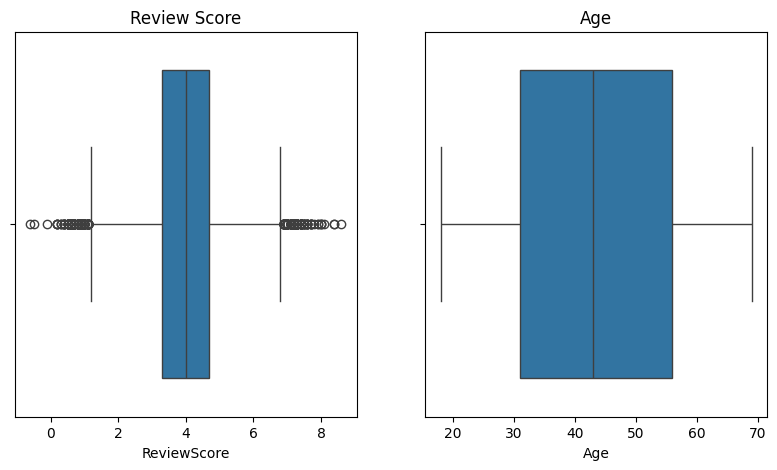

In [ ]:
#Visualisasi Boxplot ReviewScore & Score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.boxplot(x=df['ReviewScore'])
plt.title('Review Score')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Age'])
plt.title('Age')

**Insight:** Terdapat banyak outlier pada fitur ReviewScore, yang menandakan data abnormal seperti adanya banyak review negatif pada data. Untuk fitur age, tidak ada outlier dan semuanya normal.

# **4. Data Preprocessing**

### Drop data abnormal

Kita akan drop ReviewScore yang lebih dari 5 dan kurang dari 1. Ini dilakukan karena dari website dataset dinyatakan bahwa range ReviewScore hanya 1-5, jadi nilai diluar dari range tersebut adalah data abnormal/outlier.

In [ ]:
#Drop review > 5 dan < 1
final_df = df[(df['ReviewScore'] <= 5) & (df['ReviewScore'] >= 1)]
final_df

,UserID,UserName,Age,Gender,Country,SignUpDate,ProductID,ProductName,Category,Price,PurchaseDate,Quantity,TotalAmount,HasDiscountApplied,DiscountRate,ReviewScore,ReviewText,LastLogin,SessionDuration,DeviceType,ReferralSource
2,3,User_3,43,Male,Canada,2022-07-08,3299,Headphones,Apparel,64.88,2021-11-30,2,129.76,False,0.03,3.2,Good,2024-07-28 04:04:27.591611,59.09,Tablet,Organic Search
3,4,User_4,44,Male,Germany,2021-06-07,8795,T-shirt,Apparel,465.08,2021-10-14,2,930.16,False,0.23,4.3,Good,2024-03-11 04:04:27.591615,55.42,Desktop,Email Marketing
5,6,User_6,54,Male,USA,2021-04-04,1524,Smartphone,Apparel,939.70,2021-08-05,1,939.70,False,0.21,4.6,Poor,2024-09-26 04:04:27.591623,37.30,Mobile,Social Media
6,7,User_7,64,Male,USA,2021-07-07,4981,Laptop,Accessories,692.04,2021-12-02,2,1384.08,True,0.06,3.7,Poor,2024-04-17 04:04:27.591627,60.09,Mobile,Email Marketing
7,8,User_8,59,Male,India,2020-08-10,1847,Headphones,Accessories,571.93,2021-05-17,4,2287.72,True,0.34,3.6,Excellent,2024-07-20 04:04:27.591631,114.18,Desktop,Email Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99995,User_99995,18,Non-Binary,India,2020-10-05,5520,Headphones,Electronics,932.63,2021-07-24,2,1865.26,False,0.45,3.5,Excellent,2024-03-06 04:04:28.072373,14.48,Mobile,Organic Search
99995,99996,User_99996,25,Female,UK,2020-11-18,8401,Shoes,Accessories,213.12,2021-11-10,1,213.12,True,0.04,4.9,Poor,2024-04-05 04:04:28.072377,96.64,Tablet,Organic Search
99997,99998,User_99998,25,Male,Canada,2020-04-13,7686,Laptop,Electronics,515.35,2021-07-02,3,1546.05,True,0.21,4.0,Average,2024-08-28 04:04:28.072384,15.69,Tablet,Social Media
99998,99999,User_99999,63,Female,Germany,2022-12-23,2885,Watch,Books,448.82,2021-09-27,2,897.64,True,0.09,2.0,Poor,2024-10-07 04:04:28.072388,28.95,Tablet,Organic Search


### Drop fitur yang tidak diperlukan

Drop kolom UserName, SignUpDate, PurchaseDate, Quantity, TotalAmount, HasDiscountApplied, DiscountRate, ReviewText, LastLogin, SessionDuration, DeviceType, & ReferralSource karena tidak terlalu diperlukan.

In [ ]:
#Drop kolom UserName, SignUpDate, PurchaseDate, Quantity, TotalAmount, HasDiscountApplied, DiscountRate, ReviewText, LastLogin, SessionDuration, DeviceType, & ReferralSource
final_df = final_df.drop(['UserName', 'SignUpDate', 'PurchaseDate', 'Quantity', 'TotalAmount', 'HasDiscountApplied', 'DiscountRate', 'ReviewText', 'LastLogin', 'SessionDuration', 'DeviceType', 'ReferralSource'], axis=1)
final_df

,UserID,Age,Gender,Country,ProductID,ProductName,Category,Price,ReviewScore
2,3,43,Male,Canada,3299,Headphones,Apparel,64.88,3.2
3,4,44,Male,Germany,8795,T-shirt,Apparel,465.08,4.3
5,6,54,Male,USA,1524,Smartphone,Apparel,939.70,4.6
6,7,64,Male,USA,4981,Laptop,Accessories,692.04,3.7
7,8,59,Male,India,1847,Headphones,Accessories,571.93,3.6
...,...,...,...,...,...,...,...,...,...
99994,99995,18,Non-Binary,India,5520,Headphones,Electronics,932.63,3.5
99995,99996,25,Female,UK,8401,Shoes,Accessories,213.12,4.9
99997,99998,25,Male,Canada,7686,Laptop,Electronics,515.35,4.0
99998,99999,63,Female,Germany,2885,Watch,Books,448.82,2.0


### Memperbaiki data abnormal

Kita akan mengubah kolom Category sesuai dengan ProductName. Ini dilakukan karena adanya data abnormal seperti nama produk T-shirt yang berada pada kategori lain selain Apparel.

In [ ]:
#Ganti kategori sesuai nama produk
apparel = ['T-shirt', 'Shoes']
electronics = ['Laptop', 'Smartphone']
books = ['Book']
accessories = ['Headphones', 'Watch']
final_df.loc[final_df['ProductName'].isin(apparel), 'Category'] = 'Apparel'
final_df.loc[final_df['ProductName'].isin(electronics), 'Category'] = 'Electronics'
final_df.loc[final_df['ProductName'].isin(books), 'Category'] = 'Books'
final_df.loc[final_df['ProductName'].isin(accessories), 'Category'] = 'Accessories'
final_df

,UserID,Age,Gender,Country,ProductID,ProductName,Category,Price,ReviewScore
2,3,43,Male,Canada,3299,Headphones,Accessories,64.88,3.2
3,4,44,Male,Germany,8795,T-shirt,Apparel,465.08,4.3
5,6,54,Male,USA,1524,Smartphone,Electronics,939.70,4.6
6,7,64,Male,USA,4981,Laptop,Electronics,692.04,3.7
7,8,59,Male,India,1847,Headphones,Accessories,571.93,3.6
...,...,...,...,...,...,...,...,...,...
99994,99995,18,Non-Binary,India,5520,Headphones,Accessories,932.63,3.5
99995,99996,25,Female,UK,8401,Shoes,Apparel,213.12,4.9
99997,99998,25,Male,Canada,7686,Laptop,Electronics,515.35,4.0
99998,99999,63,Female,Germany,2885,Watch,Accessories,448.82,2.0


### Round nilai ReviewScore

Kita akan round ReviewScore agar lebih mudah untuk diproses ke tahap modeling nantinya.

In [ ]:
#Fungsi untuk round (ceil & floor) ReviewScore
def round(x):
    if x % 1 == 0.5:
        return np.ceil(x)
    else:
        return np.floor(x)

In [ ]:
#Round ReviewScore
final_df['RoundedScore'] = final_df['ReviewScore'].apply(round)
final_df.drop('ReviewScore', axis=1, inplace=True)
final_df.rename(columns={'RoundedScore': 'ReviewScore'}, inplace=True)
final_df

,UserID,Age,Gender,Country,ProductID,ProductName,Category,Price,ReviewScore
2,3,43,Male,Canada,3299,Headphones,Accessories,64.88,3.0
3,4,44,Male,Germany,8795,T-shirt,Apparel,465.08,4.0
5,6,54,Male,USA,1524,Smartphone,Electronics,939.70,4.0
6,7,64,Male,USA,4981,Laptop,Electronics,692.04,3.0
7,8,59,Male,India,1847,Headphones,Accessories,571.93,3.0
...,...,...,...,...,...,...,...,...,...
99994,99995,18,Non-Binary,India,5520,Headphones,Accessories,932.63,4.0
99995,99996,25,Female,UK,8401,Shoes,Apparel,213.12,4.0
99997,99998,25,Male,Canada,7686,Laptop,Electronics,515.35,4.0
99998,99999,63,Female,Germany,2885,Watch,Accessories,448.82,2.0


### Membuat ProductName Menjadi Unik

In [ ]:
#Kombinasi ProductName dengan ProductID supaya produk menjadi unik dan banyak variasi produk
final_df['ProductName'] = final_df['ProductName'] + '_' + final_df['ProductID'].astype(str)

### Memastikan dataframe terakhir

In [ ]:
#Cek dataframe akhir
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85102 entries, 2 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UserID       85102 non-null  int64  
 1   Age          85102 non-null  int64  
 2   Gender       85102 non-null  object 
 3   Country      85102 non-null  object 
 4   ProductID    85102 non-null  int64  
 5   ProductName  85102 non-null  object 
 6   Category     85102 non-null  object 
 7   Price        85102 non-null  float64
 8   ReviewScore  85102 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.5+ MB


In [ ]:
#Cek data null
final_df.isna().sum()

,0
UserID,0
Age,0
Gender,0
Country,0
ProductID,0
ProductName,0
Category,0
Price,0
ReviewScore,0


In [ ]:
#Cek tipe kategori
final_df.Category.unique()

array(['Accessories', 'Apparel', 'Electronics', 'Books'], dtype=object)

In [ ]:
#Cek kategori nama produk
final_df.ProductName.unique()

array(['Headphones_3299', 'T-shirt_8795', 'Smartphone_1524', ...,
       'Shoes_6095', 'Laptop_6767', 'Smartphone_9197'], dtype=object)

In [ ]:
#Cek kategori id produk
final_df.ProductID.unique()

array([3299, 8795, 1524, ..., 2855, 7920, 6268])

Dari kategori nama produk dan ID produk, dapat dilihat bahwa terdapat lebih banyak ID unik dibandingkan nama produk. Ini tidak apa-apa karena ada kemungkinan bahwa produknya sama tipe tapi beda merek (dari perbedaan ID).

In [ ]:
#Cek range reviewscore
final_df.ReviewScore.unique()

array([3., 4., 2., 5., 1.])

### Content Based Filtering Dataset

Untuk Content Based Filtering kita hanya akan menggunakan kolom ProductID, ProductName, Category, dan Price.

In [ ]:
content_based = final_df[['ProductID', 'ProductName', 'Category', 'Price']]
content_based.head()

,ProductID,ProductName,Category,Price
2,3299,Headphones_3299,Accessories,64.88
3,8795,T-shirt_8795,Apparel,465.08
5,1524,Smartphone_1524,Electronics,939.70
6,4981,Laptop_4981,Electronics,692.04
7,1847,Headphones_1847,Accessories,571.93


In [ ]:
#Cek duplikat untuk ProductID
content_based[content_based.duplicated(subset=['ProductID'])]

,ProductID,ProductName,Category,Price
196,8384,Book_8384,Books,634.09
279,5812,Book_5812,Books,272.05
280,6410,Book_6410,Books,244.55
340,6570,Book_6570,Books,76.13
347,6721,Watch_6721,Accessories,728.51
...,...,...,...,...
99994,5520,Headphones_5520,Accessories,932.63
99995,8401,Shoes_8401,Apparel,213.12
99997,7686,Laptop_7686,Electronics,515.35
99998,2885,Watch_2885,Accessories,448.82


In [ ]:
#Drop duplikat tersebut
content_based = content_based.drop_duplicates(subset=['ProductID'])
content_based

,ProductID,ProductName,Category,Price
2,3299,Headphones_3299,Accessories,64.88
3,8795,T-shirt_8795,Apparel,465.08
5,1524,Smartphone_1524,Electronics,939.70
6,4981,Laptop_4981,Electronics,692.04
7,1847,Headphones_1847,Accessories,571.93
...,...,...,...,...
79291,7092,Laptop_7092,Electronics,338.52
80178,3651,Headphones_3651,Accessories,91.46
83970,2855,Shoes_2855,Apparel,150.00
85394,7920,Laptop_7920,Electronics,761.19


### Collaborative Filtering Dataset

Untuk dataset collaborative filtering, kita akan memakai UserID, ProductID, ProductName, Category, dan ReviewScore.

In [ ]:
collab_df = final_df[['UserID', 'ProductID', 'ProductName', 'Category', 'ReviewScore']].copy()
collab_df

,UserID,ProductID,ProductName,Category,ReviewScore
2,3,3299,Headphones_3299,Accessories,3.0
3,4,8795,T-shirt_8795,Apparel,4.0
5,6,1524,Smartphone_1524,Electronics,4.0
6,7,4981,Laptop_4981,Electronics,3.0
7,8,1847,Headphones_1847,Accessories,3.0
...,...,...,...,...,...
99994,99995,5520,Headphones_5520,Accessories,4.0
99995,99996,8401,Shoes_8401,Apparel,4.0
99997,99998,7686,Laptop_7686,Electronics,4.0
99998,99999,2885,Watch_2885,Accessories,2.0


In [ ]:
#Mengubah userID menjadi list tanpa nilai yang sama
user_ids = collab_df['UserID'].unique().tolist()
print('list UserID: ', user_ids)

list UserID:  [3, 4, 6, 7, 8, 9, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 82, 83, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 135, 136, 137, 139, 142, 143, 144, 145, 146, 147, 148, 149, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 176, 178, 179, 180, 181, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 224, 225, 227, 228, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 249, 250, 251, 252, 254, 255, 257, 258,

In [ ]:
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

encoded userID :  {3: 0, 4: 1, 6: 2, 7: 3, 8: 4, 9: 5, 13: 6, 14: 7, 15: 8, 16: 9, 17: 10, 18: 11, 19: 12, 20: 13, 22: 14, 24: 15, 26: 16, 27: 17, 28: 18, 29: 19, 31: 20, 32: 21, 34: 22, 35: 23, 36: 24, 37: 25, 38: 26, 39: 27, 40: 28, 41: 29, 42: 30, 43: 31, 44: 32, 45: 33, 46: 34, 47: 35, 49: 36, 50: 37, 53: 38, 54: 39, 55: 40, 56: 41, 57: 42, 58: 43, 59: 44, 60: 45, 62: 46, 63: 47, 64: 48, 65: 49, 66: 50, 68: 51, 69: 52, 70: 53, 71: 54, 72: 55, 73: 56, 76: 57, 77: 58, 78: 59, 79: 60, 80: 61, 82: 62, 83: 63, 85: 64, 86: 65, 87: 66, 89: 67, 90: 68, 91: 69, 92: 70, 93: 71, 94: 72, 95: 73, 96: 74, 97: 75, 98: 76, 99: 77, 101: 78, 102: 79, 103: 80, 104: 81, 105: 82, 106: 83, 107: 84, 108: 85, 109: 86, 110: 87, 111: 88, 112: 89, 113: 90, 114: 91, 115: 92, 116: 93, 117: 94, 118: 95, 119: 96, 120: 97, 121: 98, 122: 99, 123: 100, 124: 101, 125: 102, 127: 103, 128: 104, 129: 105, 130: 106, 131: 107, 132: 108, 135: 109, 136: 110, 137: 111, 139: 112, 142: 113, 143: 114, 144: 115, 145: 116, 146: 

In [ ]:
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

encoded angka ke userID:  {0: 3, 1: 4, 2: 6, 3: 7, 4: 8, 5: 9, 6: 13, 7: 14, 8: 15, 9: 16, 10: 17, 11: 18, 12: 19, 13: 20, 14: 22, 15: 24, 16: 26, 17: 27, 18: 28, 19: 29, 20: 31, 21: 32, 22: 34, 23: 35, 24: 36, 25: 37, 26: 38, 27: 39, 28: 40, 29: 41, 30: 42, 31: 43, 32: 44, 33: 45, 34: 46, 35: 47, 36: 49, 37: 50, 38: 53, 39: 54, 40: 55, 41: 56, 42: 57, 43: 58, 44: 59, 45: 60, 46: 62, 47: 63, 48: 64, 49: 65, 50: 66, 51: 68, 52: 69, 53: 70, 54: 71, 55: 72, 56: 73, 57: 76, 58: 77, 59: 78, 60: 79, 61: 80, 62: 82, 63: 83, 64: 85, 65: 86, 66: 87, 67: 89, 68: 90, 69: 91, 70: 92, 71: 93, 72: 94, 73: 95, 74: 96, 75: 97, 76: 98, 77: 99, 78: 101, 79: 102, 80: 103, 81: 104, 82: 105, 83: 106, 84: 107, 85: 108, 86: 109, 87: 110, 88: 111, 89: 112, 90: 113, 91: 114, 92: 115, 93: 116, 94: 117, 95: 118, 96: 119, 97: 120, 98: 121, 99: 122, 100: 123, 101: 124, 102: 125, 103: 127, 104: 128, 105: 129, 106: 130, 107: 131, 108: 132, 109: 135, 110: 136, 111: 137, 112: 139, 113: 142, 114: 143, 115: 144, 116: 14

In [ ]:
#Mengubah ProductID menjadi list tanpa nilai yang sama
product_ids = collab_df['ProductID'].unique().tolist()
print('list ProductID: ', product_ids)

list ProductID:  [3299, 8795, 1524, 4981, 1847, 3054, 7529, 2204, 2211, 4549, 7883, 1866, 6620, 8382, 8775, 6057, 7875, 5744, 3993, 4990, 8569, 6334, 8450, 1285, 9668, 2844, 7664, 8021, 1940, 7307, 7650, 4269, 1619, 2916, 9179, 3242, 9763, 3220, 4154, 7126, 1217, 8112, 6410, 2797, 9938, 3941, 2557, 3649, 6407, 6289, 7019, 7491, 7935, 9592, 2997, 2650, 6999, 9193, 5471, 3199, 8195, 4588, 7765, 7766, 4372, 3330, 6379, 9840, 6570, 8024, 2126, 8121, 9980, 9977, 5692, 9906, 2151, 1759, 2629, 2651, 8818, 8951, 6230, 4487, 5000, 1326, 2909, 9521, 9648, 8479, 9085, 6049, 5232, 5508, 5775, 8384, 7731, 8004, 5609, 2494, 2435, 2140, 3699, 5979, 7388, 5202, 8223, 8923, 4298, 4178, 9674, 2834, 4972, 5774, 5999, 4108, 1570, 8895, 8026, 3192, 5725, 2349, 8084, 7425, 2757, 4064, 2458, 6831, 4437, 7472, 1245, 2325, 9935, 7346, 2951, 1758, 2018, 9242, 7940, 5545, 2468, 7885, 5813, 5188, 3564, 1178, 3717, 3519, 8834, 6866, 8599, 3734, 6402, 1817, 8973, 1753, 7045, 9358, 8082, 6198, 7154, 1466, 2748, 2410

In [ ]:
#Melakukan proses encoding ProductID
product_to_product_encoded = {x: i for i, x in enumerate(product_ids)}
print('encoded ProductID : ', product_to_product_encoded)

encoded ProductID :  {3299: 0, 8795: 1, 1524: 2, 4981: 3, 1847: 4, 3054: 5, 7529: 6, 2204: 7, 2211: 8, 4549: 9, 7883: 10, 1866: 11, 6620: 12, 8382: 13, 8775: 14, 6057: 15, 7875: 16, 5744: 17, 3993: 18, 4990: 19, 8569: 20, 6334: 21, 8450: 22, 1285: 23, 9668: 24, 2844: 25, 7664: 26, 8021: 27, 1940: 28, 7307: 29, 7650: 30, 4269: 31, 1619: 32, 2916: 33, 9179: 34, 3242: 35, 9763: 36, 3220: 37, 4154: 38, 7126: 39, 1217: 40, 8112: 41, 6410: 42, 2797: 43, 9938: 44, 3941: 45, 2557: 46, 3649: 47, 6407: 48, 6289: 49, 7019: 50, 7491: 51, 7935: 52, 9592: 53, 2997: 54, 2650: 55, 6999: 56, 9193: 57, 5471: 58, 3199: 59, 8195: 60, 4588: 61, 7765: 62, 7766: 63, 4372: 64, 3330: 65, 6379: 66, 9840: 67, 6570: 68, 8024: 69, 2126: 70, 8121: 71, 9980: 72, 9977: 73, 5692: 74, 9906: 75, 2151: 76, 1759: 77, 2629: 78, 2651: 79, 8818: 80, 8951: 81, 6230: 82, 4487: 83, 5000: 84, 1326: 85, 2909: 86, 9521: 87, 9648: 88, 8479: 89, 9085: 90, 6049: 91, 5232: 92, 5508: 93, 5775: 94, 8384: 95, 7731: 96, 8004: 97, 5609: 98

In [ ]:
# Melakukan proses encoding angka ke ke ProductID
product_encoded_to_product = {i: x for i, x in enumerate(product_ids)}
print('encoded angka ke productID: ', product_encoded_to_product)

encoded angka ke productID:  {0: 3299, 1: 8795, 2: 1524, 3: 4981, 4: 1847, 5: 3054, 6: 7529, 7: 2204, 8: 2211, 9: 4549, 10: 7883, 11: 1866, 12: 6620, 13: 8382, 14: 8775, 15: 6057, 16: 7875, 17: 5744, 18: 3993, 19: 4990, 20: 8569, 21: 6334, 22: 8450, 23: 1285, 24: 9668, 25: 2844, 26: 7664, 27: 8021, 28: 1940, 29: 7307, 30: 7650, 31: 4269, 32: 1619, 33: 2916, 34: 9179, 35: 3242, 36: 9763, 37: 3220, 38: 4154, 39: 7126, 40: 1217, 41: 8112, 42: 6410, 43: 2797, 44: 9938, 45: 3941, 46: 2557, 47: 3649, 48: 6407, 49: 6289, 50: 7019, 51: 7491, 52: 7935, 53: 9592, 54: 2997, 55: 2650, 56: 6999, 57: 9193, 58: 5471, 59: 3199, 60: 8195, 61: 4588, 62: 7765, 63: 7766, 64: 4372, 65: 3330, 66: 6379, 67: 9840, 68: 6570, 69: 8024, 70: 2126, 71: 8121, 72: 9980, 73: 9977, 74: 5692, 75: 9906, 76: 2151, 77: 1759, 78: 2629, 79: 2651, 80: 8818, 81: 8951, 82: 6230, 83: 4487, 84: 5000, 85: 1326, 86: 2909, 87: 9521, 88: 9648, 89: 8479, 90: 9085, 91: 6049, 92: 5232, 93: 5508, 94: 5775, 95: 8384, 96: 7731, 97: 8004, 

In [ ]:
# Mapping ProductID ke dataframe user
collab_df['user'] = collab_df['UserID'].map(user_to_user_encoded)

# Mapping placeID ke dataframe product
collab_df['product'] = collab_df['ProductID'].map(product_to_product_encoded)

In [ ]:
#Cek data yang sudah diencoding
num_users = len(user_to_user_encoded)
print(num_users)

num_product = len(product_encoded_to_product)
print(num_product)

collab_df['ReviewScore'] = collab_df['ReviewScore'].values.astype(np.float32)
min_ReviewScore = min(collab_df['ReviewScore'])
max_ReviewScore = max(collab_df['ReviewScore'])

print('Number of User: {}, Number of Product: {}, Min ReviewScore: {}, Max ReviewScore: {}'.format(
    num_users, num_product, min_ReviewScore, max_ReviewScore
))

85102
8997
Number of User: 85102, Number of Product: 8997, Min ReviewScore: 1.0, Max ReviewScore: 5.0


In [ ]:
#Shuffle data
collab_df = collab_df.sample(frac=1, random_state=42)
collab_df

,UserID,ProductID,ProductName,Category,ReviewScore,user,product
41694,41695,7603,T-shirt_7603,Apparel,3.0,35544,8744
2138,2139,4296,Book_4296,Books,4.0,1815,1638
80902,80903,2948,Watch_2948,Accessories,3.0,68874,5675
8511,8512,9393,Headphones_9393,Accessories,3.0,7285,5032
98923,98924,1643,Laptop_1643,Electronics,4.0,84181,3287
...,...,...,...,...,...,...,...
7323,7324,5743,Laptop_5743,Electronics,4.0,6265,4547
64436,64437,1053,Headphones_1053,Accessories,4.0,54886,8501
90308,90309,6579,Smartphone_6579,Electronics,3.0,76820,7936
1022,1023,5427,Laptop_5427,Electronics,5.0,860,823


In [ ]:
#Membagi data ke train dan test set
x = collab_df[['user', 'product']].values
y = collab_df['ReviewScore'].apply(lambda x: (x - min_ReviewScore) / (max_ReviewScore - min_ReviewScore)).values

train_indices = int(0.8 * collab_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[35544  8744]
 [ 1815  1638]
 [68874  5675]
 ...
 [76820  7936]
 [  860   823]
 [15795   896]] [0.5  0.75 0.5  ... 0.5  1.   0.5 ]


# **5. Modeling**

##  A. Content Based Filtering

Content-Based Filtering adalah metode sistem rekomendasi yang merekomendasikan item/produk kepada pengguna berdasarkan kemiripan karakteristik item dengan item/produk yang disukai/dibeli pengguna sebelumnya. Sistem ini menganalisis fitur konten dari item (misalnya genre film atau kategori produk) dan mencocokkannya dengan preferensi pengguna. Content-based filtering digunakan karena dapat memberikan rekomendasi yang dipersonalisasi, sehingga bisa memberikan apa yang pengguna mau.

Kelebihan:
- Tidak memerlukan data dari pengguna lain (bisa bekerja untuk satu user saja).
- Memberikan rekomendasi yang lebih personal sehingga meningkatkan kepuasan pengguna.
- Tidak terpengaruh oleh popularitas item sehingga fokus ke data mirip saja.

Kekurangan:
- Susah untuk merekomendasikan item yang sangat berbeda dari history pengguna.
- Bergantung pada kualitas fitur item yang artinya memerlukan data konten yang lengkap dan relevan.



### Inisialisasi TF-IDF

TF-IDF adalah teknik yang mengukur seberapa penting sebuah kata dalam sebuah dokumen. Pada proses ini, TF-IDF akan digunakan untuk mengubah data teks (seperti kategori, nama produk, dll.) menjadi representasi numerik, sehingga kita bisa hitung kemiripannya antar item menggunakan metode cosine similarity.

In [ ]:
#Inisialisasi TF-IDF
tfidf = TfidfVectorizer()
tfidf.fit(content_based['Category'])
tfidf.get_feature_names_out()

array(['accessories', 'apparel', 'books', 'electronics'], dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tfidf.fit_transform(content_based['Category'])
tfidf_matrix.shape

(8997, 4)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        ...,
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.]])

### Menghitung Cosine Similarity

Cosine Similarity adalah metode untuk mengukur kemiripan antara dua vektor berdasarkan sudut cosine di antara mereka. Jadi kita akan menghitung cosine similarity dari matriks TF-IDF yang didapat sebelumnya. Semakin tinggi nilainya, semakin mirip item tersebut, jadi besar kemungkinan mereka direkomendasikan bersama. Rumus:

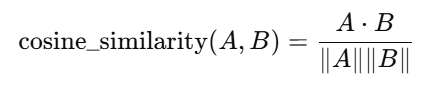

dimana:
- A⋅B: dot product antara dua vektor
- ∥A∥: panjang dari vektor A
- ∥B∥: panjang dari vektor B

In [ ]:
# Menghitung similarity dengan cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel similarity
similarity_df = pd.DataFrame(cosine_sim, index=content_based['ProductName'], columns=content_based['ProductName'])
print('Shape:', similarity_df.shape)

similarity_df.sample(5, axis=1).sample(10, axis=0)

Shape: (8997, 8997)


ProductName,Laptop_3739,Shoes_2169,Headphones_7864,T-shirt_3604,Headphones_1733
ProductName,,,,,
Book_2182,0.0,0.0,0.0,0.0,0.0
Headphones_6061,0.0,0.0,1.0,0.0,1.0
Laptop_6925,1.0,0.0,0.0,0.0,0.0
Smartphone_1732,1.0,0.0,0.0,0.0,0.0
Headphones_1741,0.0,0.0,1.0,0.0,1.0
Headphones_1077,0.0,0.0,1.0,0.0,1.0
Watch_3528,0.0,0.0,1.0,0.0,1.0
Laptop_8060,1.0,0.0,0.0,0.0,0.0
T-shirt_5273,0.0,1.0,0.0,1.0,0.0


### Hasil Rekomendasi

In [ ]:
#Fungsi untuk mendapatkan rekomendasi
def recommendations(ProductName, similarity_data=similarity_df, items=content_based[['ProductName', 'Category']], k=5):
    index = similarity_data.loc[:,ProductName].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(ProductName, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
content_based[content_based.ProductName.eq('Shoes_8395')]

,ProductID,ProductName,Category,Price
3256,8395,Shoes_8395,Apparel,868.6


In [ ]:
#Top 5 rekomendasi untuk yang membeli sepatu 8395
rec = recommendations('Shoes_8395')
rec

,ProductName,Category
0,T-shirt_5509,Apparel
1,T-shirt_6373,Apparel
2,Shoes_2168,Apparel
3,T-shirt_3229,Apparel
4,Shoes_5176,Apparel


Jadi top 5 rekomendasi untuk orang yang membeli Shoes_8395 adalah T-shirt_5509, T-shirt_6373, Shoes_2168, T-shirt_3229, dan Shoes_5176.

## B. Collborative Filtering

Collaborative Filtering adalah metode sistem rekomendasi yang memberikan saran produk atau item kepada pengguna berdasarkan interaksi dan preferensi pengguna lain yang serupa. Jadi bukan menggunakan informasi konten dari item (seperti kategori atau deskripsi), melainkan memakai pola perilaku pengguna, seperti rating, pembelian, atau klik. Dengan kata lain, sistem ini menyimpulkan bahwa jika pengguna A dan pengguna B menyukai item yang sama, maka item lain yang disukai B kemungkinan juga akan disukai A.

Kelebihan:
- Tidak memerlukan informasi detail tentang item
- Cocok untuk berbagai jenis data
- Dapat menemukan hubungan tidak terduga dari antar item/produk

Kekurangan:
- Cold Start Problem yaitu sulit merekomendasikan untuk pengguna yang belum punya cukup interaksi atau rating.
- Jika dataset sangat besar dan punya banyak nilai kosong, model bisa kesulitan menemukan pola yang kuat.
- Popularitas bisa mendominasi hasil rekomendasi.

### Buat kelas RecommenderNet untuk pembangunan model.

In [ ]:
class RecommenderNet(tf.keras.Model):
  # Insialisasi fungsi
  def __init__(self, num_users, num_product, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_product = num_product
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.product_embedding = layers.Embedding(
        num_product,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.product_bias = layers.Embedding(num_product, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    product_vector = self.product_embedding(inputs[:, 1])
    product_bias = self.product_bias(inputs[:, 1])

    dot_user_product = tf.tensordot(user_vector, product_vector, 2)
    x = dot_user_product + user_bias + product_bias
    return tf.nn.sigmoid(x)

In [ ]:
#Inisialisasi model & compile
model = RecommenderNet(num_users, num_product, 50)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

### Train model

In [ ]:
#Training model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=512,
    epochs=50,
    validation_data=(x_val, y_val)
)

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.6934 - root_mean_squared_error: 0.2387 - val_loss: 0.6926 - val_root_mean_squared_error: 0.2366
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.9248 - root_mean_squared_error: 0.3295 - val_loss: 0.6936 - val_root_mean_squared_error: 0.2375
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.6809 - root_mean_squared_error: 0.2250 - val_loss: 0.6936 - val_root_mean_squared_error: 0.2374
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.7005 - root_mean_squared_error: 0.2399 - val_loss: 0.6943 - val_root_mean_squared_error: 0.2379
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.8188 - root_mean_squared_error: 0.3291 - val_loss: 0.6937 - val_root_mean_squared_error: 0.2367
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 1.2129 - root_mean_squared_error: 0.3927 - val_loss: 0.6968 - val_root_mean_squared_error: 0.2394
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10

Hasil akhir menunjukkan RMSE 0.14 dan RMSE dari data validasi 0.238

### Menyiapkan dataframe produk yang belum dibeli oleh pengguna.

In [ ]:
#Menyiapkan data produk yang belum pernah dibeli oleh satu pengguna acak.
product_df = final_df.drop_duplicates(subset='ProductID') #Ambil produk unik saja karena pada final_df ada kemungkinan pengguna beli produk 2x dan tercatat idnya 2x
df = final_df[['UserID', 'ProductID', 'ProductName', 'Category', 'ReviewScore']].drop_duplicates()

user_id = df.UserID.sample(1).iloc[0]
product_bought_by_user = df[df.UserID == user_id]

product_not_bought = product_df[~product_df['ProductID'].isin(product_bought_by_user.ProductID.values)]['ProductID']
product_not_bought = list(
    set(product_not_bought)
    .intersection(set(product_to_product_encoded.keys()))
)

product_not_bought = [[product_to_product_encoded.get(x)] for x in product_not_bought]
user_encoder = user_to_user_encoded.get(user_id)
user_product_array = np.hstack(
    ([[user_encoder]] * len(product_not_bought), product_not_bought)
)

### Menampilkan hasil rekomendasi

In [ ]:
# Hasil rekomendasi
ratings = model.predict(user_product_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_product_ids = [
    product_encoded_to_product.get(product_not_bought[x][0]) for x in top_ratings_indices
]
print('Showing recommendations for user:', user_id)
print('===' * 9)

recommended_product = product_df[product_df['ProductID'].isin(recommended_product_ids)]
print('Top 10 product recommendations')
print('----' * 8)
for row in recommended_product.itertuples():
    print(row.ProductName, ':', row.Category)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for user: 72950
Top 10 product recommendations
--------------------------------
Book_2771 : Books
Shoes_2841 : Apparel
Headphones_7764 : Accessories
Smartphone_8182 : Electronics
Headphones_5405 : Accessories
Shoes_9131 : Apparel
Book_4149 : Books
Shoes_5958 : Apparel
Smartphone_7589 : Electronics
Laptop_9798 : Electronics


Top 10 rekomendasi yang diberikan pada user 74035 adalah Shoes_1584, Smartphone_2408, Shoes_2841, Smartphone_8182, Headphones_5405, Shoes_9131, T-shirt_1447, Laptop_9798, T-shirt_7063, dan Headphones_4657.



# **6. Evaluation**

### Content Based Filtering

Disini untuk modeling content based filtering, metrik evaluasi yang digunakan adalah **precision at k**. Precision adalah metrik evaluasi yang mengukur seberapa banyak rekomendasi terbaik (top-k rekomendasi) yang relevan terhadap kebutuhan pengguna. Di aplikasi ecommerce, pengguna biasanya hanya melihat beberapa rekomendasi teratas. Jadi, kita perlu tahu apakah rekomendasi yang paling atas benar-benar berguna dan sesuai dengan selera mereka dan precision at k ini dapat melihat apakah sistem mampu mengurutkan rekomendasi dengan benar dengan menempatkan item yang relevan di posisi atas.

Cara kerja:
- Ambil top-k rekomendasi dari model (misal k=5).
- Identifikasi rekomendasi dari produk yang diinput.
- Hitung item/produk relevan yang muncul di top-k rekomendasi.
- Hitung precision dengan membagi jumlah item relevan dengan k.

Rumus:

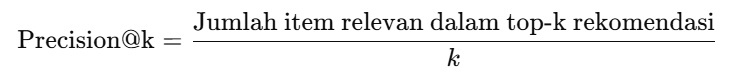

dimana:
- Item relevan adalah produk/item yang memang disukai pengguna.
- Top-k rekomendasi adalah k produk yang direkomendasikan pertama kali oleh sistem.



In [ ]:
#Fungsi menghitung precision
def count_precision(product_name, recommendations, product_data, k=5):
    original_category = product_data.loc[product_data['ProductName'] == product_name, 'Category'].values[0]
    top_k_recommendations = recommendations.head(k) if isinstance(recommendations, pd.DataFrame) else recommendations[:k]

    if isinstance(top_k_recommendations, pd.DataFrame):
        same_category_count = (top_k_recommendations['Category'] == original_category).sum()
    else:
        same_category_count = sum(
            product_data.loc[product_data['ProductName'] == rec, 'Category'].values[0] == original_category
            for rec in top_k_recommendations
        )

    precision = same_category_count / k
    return precision

In [ ]:
precision = count_precision('Shoes_8395', rec, content_based)
print(f'Precision: {precision:.2f}')

Precision: 1.00


Precision yang dihasilkan 1.00, berarti semua rekomendasi dalam top-k yang dihasilkan adalah hasil yang relevan untuk pengguna tersebut.

### Collaborative Filtering

Untuk collaborative filtering, kita akan menggunakan metrik evaluasi **Root Mean Squuared Error** (RMSE). RMSE adalah metrik evaluasi yang digunakan untuk mengukur perbedaan antara nilai yang diprediksi oleh model dengan nilai asli. Dalam konteks sistem rekomendasi berbasis collaborative filtering yang memprediksi hasil, RMSE menunjukkan seberapa dekat prediksi model dengan hasil sebenarnya yang diberikan oleh pengguna. Dengan RMSE, kita dapat melihat tren error selama training dan mendeteksi overfitting atau underfitting.
Rumus:

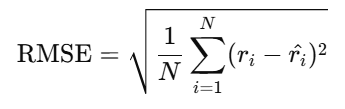

Dimana:
- N = jumlah total data (jumlah prediksi yang dibandingkan)
- ri= nilai asli
- ri^ = nilai yang diprediksi oleh model

Disini akan kita visualisasi RMSE dari model yang dibangun sebelumnya untuk melihat apakah model mengalami overfitting atau underfitting.

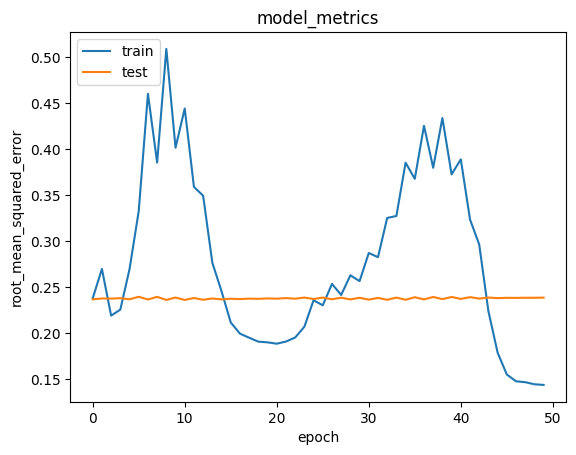

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Insight:**
- Training Loss sangat fluktuatif di awal sehingga menunjukkan tanda-tanda overfitting. Namun, bisa dilihat training loss turun signifikan yang menandakan model semakin hafal data training.
- Testing loss seimbang pada hampir semua epoch. Ini menunjukkan tidak ada perbaikan performa pada data testing yang mengakibatkan model tidak mampu generalisasi dengan baik.

# **7. Conclusion**

- RMSE pada data train mencapai 0.14 dan RMSE dari data validasi mencapai 0.238.
- Model content based filtering memberikan 5 hasil rekomendasi produk kepada pengguna berdasarkan produk yang dibeli sebelumnya dan mencapai presisi sebanyak 100%.
- Model collaborative filtering dapat memberikan 10 hasil rekomendasi produk kepada pengguna berdasarkan data ulasan dan produk dan sesuai dengan preferensi pengguna lain dengan preferensi yang sama.